In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Perceptron
import requests
import random
def split_train_test(data, test_ratio): #inputs are the data set and the ratio of the test set to training set
    shuffled_indices = np.random.permutation(len(data)) #randomly permuting the indecies (remember the seed is set)
    test_set_size = int(len(data) * test_ratio) #finding the size of the test set
    test_indices = shuffled_indices[:test_set_size] #finding which indecies will be in the test set
    train_indices = shuffled_indices[test_set_size:] #finding which indecies will be in the train set
    return data.iloc[train_indices], data.iloc[test_indices] #outputs are the train set and the test set

In [2]:
def cross(model, x ,y,k): #inputs are the model, data, labels and number of folds
      scoring = ['accuracy', 'precision', 'recall', 'f1'] #classification metrics we are looking for
      results = cross_validate(estimator=model,X=x,y=y,cv=k,scoring=scoring,return_train_score=True) #using built-in sklearn cross_validate function we perform cross validation
      return {"Training Accuracy ": results['train_accuracy'],"Mean Training Accuracy": results['train_accuracy'].mean(),"Training Precision ": results['train_precision'],"Mean Training Precision": results['train_precision'].mean(),"Training Recall ": results['train_recall'],"Mean Training Recall": results['train_recall'].mean(),"Training F1 ": results['train_f1'],"Mean Training F1 ": results['train_f1'].mean(),"Test Accuracy ": results['test_accuracy'],"Mean Test Accuracy": results['test_accuracy'].mean(),"Test Precision ": results['test_precision'],"Mean Test Precision": results['test_precision'].mean(),"Test Recall ": results['test_recall'],"Mean Test Recall": results['test_recall'].mean(),"Test F1 ": results['test_f1'],"Mean Test F1 ": results['test_f1'].mean()} #output is a dictionary of all metrics for all folds as well for as the average one
def plot_result(x_label, y_label, plot_title, train_data, val_data): #inputs are the labels, title, and the training and validation data
        plt.figure(figsize=(8,2)) #setting the plot site
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold",'6th fold','7th fold','8th fold','9th fold','10th fold'] #everywhere 10folds were used sothe labels are the same
        X_axis = np.arange(len(labels))  #create an array of indices for the folds
        plt.ylim(0.40000, 1)    #set the y-axis limits for better visualization
        plt.bar(X_axis-0.2, train_data, 0.4, color='red', label='Training') # plot the training data for each fold with a red bar
        plt.bar(X_axis+0.2, val_data, 0.4, color='green', label='Validation') # plot the validation data for each fold with a green bar
        plt.title(plot_title, fontsize=30) #set the title
        plt.xticks(X_axis, labels) # set the tick positions and labels on the x-axis
        plt.xlabel(x_label, fontsize=14) # set the x-axis label
        plt.ylabel(y_label, fontsize=14) # set the y-axis label
        plt.legend() #show legend
        plt.show() #display the plot
def plot(model_name,model_result): #inputs are the model name(what will the figure display) and its results
    plot_result(model_name,"Accuracy","Accuracy scores in 10 Folds",model_result["Training Accuracy "],model_result["Test Accuracy "]) #see plot_result for more info
    plot_result(model_name,"Precision","Precision scores in 10 Folds",model_result["Training Precision "],model_result["Test Precision "]) #see plot_result for more info
    plot_result(model_name,"Recall","Recall scores in 10 Folds", model_result["Training Recall "],model_result["Test Recall "]) #see plot_result for more info
    plot_result(model_name,"F1","F1 Scores in 10 Folds",model_result["Training F1 "],model_result["Test F1 "]) #see plot_result for more info
def stats(y,results): #inputs are labels and predictions (i realised that there are built in functions for this but a bit too late)
    tp= 0 #counter for true positives
    tn= 0 #counter for true negatives
    fp = 0 #counter for false positives
    fn = 0 #counter for false negatives
    for i in range(len(yv)): #looping thru all instances
        if results[i] == 0 and results[i] == y.iloc[i]: #checking if a result is a true negative
            tn = tn +1 #if so incresing the counter
        elif results[i] == 0 and results[i] != y.iloc[i]:  #checking if a result is a false negative
            fn = fn +1 #if so incresing the counter
        elif results[i] == 1 and results[i] == y.iloc[i]:  #checking if a result is a true postiive
            tp = tp + 1 #if so incresing the counter
        elif results[i] == 1 and results[i] != y.iloc[i]:  #checking if a result is a false positive
            fp = fp +1 #if so incresing the counter
    precision_v = tp / (tp + fp) #calucalting the precision 
    recall_v = tp / (tp + fn) #calculating the recall
    accuracy_v = (tp + tn) / (tp+tn+fp+fn) #calculating the accuarac
    f1_score_v = (2*recall_v*precision_v) / (recall_v + precision_v) #calcualting the f1 score
    stats={'precision':precision_v,'recall' : recall_v, 'accuracy' : accuracy_v,'f1 score' : f1_score_v} #putting all the classification metrics in a dictionary
    return stats #output is the aforementioned dictionary containing all the classification metrics
def dataprepare(seed): #functions only input is the seed for consistant results
    github_url = 'https://raw.githubusercontent.com/emojsovic/startup/main/startup%20data.csv'  #url that is used for fetching the data
    response = requests.get(github_url) #using the response module to get the data
    open('local_filename.csv', 'wb').write(response.content) #opening the datafile such that it can be read 
    data_raw = pd.read_csv('local_filename.csv')     # reading the datafile and saving it 
    np.random.seed(seed)     # getting the seed set 
    data=data_raw.drop(['Unnamed: 0', 'state_code','Unnamed: 6', 'zip_code','object_id','status','id','first_funding_at','last_funding_at','age_first_funding_year','age_last_funding_year','category_code','state_code.1','city','name','age_first_milestone_year','age_last_milestone_year'],axis=1)    #dropping the variables that will not be used
    data.loc[73,'closed_at'] = '2/1/2013'  #manualy correcting an incorrect entry
    data['still open'] = pd.isna(data['closed_at']).astype(int) #creating a dummy variable to see if the company is closed or not
    data['last_date']=pd.to_datetime(data['closed_at'].fillna('11/11/2023')) #setting the closing date of the firm to current date (as of last edit) as it will be used in further calculations, changing the format as well
    data['founded_at'] = pd.to_datetime(data['founded_at'])  #changing the format
    data["age"] = data["last_date"]-data["founded_at"] #creating new variable age 
    data["age"]=round(data.age/np.timedelta64(1,'D')) #changing the format to days
    data=data.drop(data[data.age<0].index) #droping broken datapoints
    data=data.drop(['founded_at','closed_at','last_date'],axis=1) #droping variables that are of no use now, but were previously for calcuations
    training, test = split_train_test(data, 0.1) #check split_train_test for more info
    xv = test.drop(['labels'],axis = 1) #droping the labels  
    yv = test['labels'] #keeping only the labels
    xt = training.drop(['labels'],axis = 1) #dropping the lables
    yt = training['labels'] #keeping the labels only
    return xv,yv,xt,yt #outputs are the input features and  labes for both training set and test set
def runmodel(model,xt,yt,xv,yv,folds,name):#inputs are the model, training data and its labels , test data and its labels, number of folds in the k fold cross variation and the name that will be under the graph
    result = cross(model,xt,yt,folds) #see function cross for more info
    plot(name,result) #see function plot
    model.fit(xt,yt) #fitting the model 
    validation = model.predict(xv) #predicting the test set
    results_validation = stats(yv,validation) #see function stats for more info
    return results_validation #returns the  classification metrics of the models testing
def runmodelshort(model,xt,yt,xv,yv): #inputs are the model, training data and its labels and test data and its labels
    model.fit(xt,yt) # we fit the model with the training data
    test = model.predict(xv) #we predict the test set
    r_test = stats(yv,test) #for more info check stats function
    return r_test['f1 score'] #output is the f1 score of this prediction
def scaler(train,validation):  #inputs are the training and test data
    scalingT = MinMaxScaler(feature_range=(-1,1)).fit(train) #using the minmax scaler with range between -1 and 1  i fit  the scaler for training data 
    scalingV = MinMaxScaler(feature_range=(-1,1)).fit(validation) #using the minmax scaler witha range between -1 and 1  i fit the scaler for test data (validation is used since test and training both start with t its cofusing for notation)
    xtscaled = scalingT.transform(train) #scaling the train data
    xvscaled = scalingV.transform(validation) # scaling the test data
    return pd.DataFrame(xtscaled), pd.DataFrame(xvscaled) #outputs are the scaled inputs in a dataframe form
def trees_tuning(): #no inputs
    test_trees = [] #creating an empty list where the results of each run will be saved
    for i in range(2,10): #the hyperparamter we are tuning is the minimal sample size, the range taken is from 2 to 9, since the dataset is relatively small this is a reasonable range
        forest =  RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_split=i) #creating a model using the hyperparameter in the range
        forest_results = runmodelshort(forest,xt,yt,xv,yv) #check runmodelshort function for more info
        test_trees.append(forest_results) #adding the results to the list we created earier
    return range(2,10)[test_trees.index(max(test_trees))] #returning  a hyperparamter that gave the highest f1 score 
def log_tuning(): #no inputs
    test_log = []  #creating an empty list where the results of each run will be saved
    options = [['liblinear', 'l1'],['lbfgs','l2'],['liblinear', 'l2'],['lbfgs','none']] #all the combinataions of solvers and penalities that work for the model
    for i in options: #looping all the options
        logmodel = LogisticRegression(solver = i[0],penalty = i[1]) #creating the model with the hyperparameters we are testing
        logmodel_results = runmodelshort(logmodel,xt,yt,xv,yv) #check runmodelshort for more info
        test_log.append(logmodel_results) #adding the result to the list created earlier
    best_choice_log = options[test_log.index(max(test_log))] #finding the combination with a highest f1 score
    return best_choice_log #output is a optimal combination of a solver and penality
def stack_tuning(estimators): #input is the estimators used
    test_stack = [] #creating an empty list where the results of each run will be saved
    options = [['liblinear', 'l1'],['lbfgs','l2'],['liblinear', 'l2'],['lbfgs','none']]
    for i in options: #looping all the options
        logmodel = LogisticRegression(solver = i[0],penalty = i[1]) #creating the model with the hyperparameters we are testing    
        stacking = StackingClassifier(estimators,final_estimator= logmodel) #all the combinataions of solvers and penalities that work for the meta-model
        stack_results = runmodelshort(stacking,xt,yt,xv,yv) #check runmodelshort for more info
        test_stack.append(stack_results)  #adding the result to the list created earlier
    best_choice_stack = options[test_stack.index(max(test_stack))] #finding the combination with a highest f1 score
    return best_choice_stack #output is a optimal combination of a solver and penality of the meta-model
def perc_tuning(): #no inputs
    test_perc = [] #creating an empty list where the results will be saved
    for pen in ['none','l1', 'l2','elasticnet']: #types of penalities that are supported 
            for eta in [0.1, 0.01, 0.001]: #learning rates 
               perc =  Perceptron(penalty = pen, max_iter= 1000,eta0= eta,tol=1e-3) #setting up the model (max iter set such that it stops very small learning rates as they are computationaly inefficient)
               perc_result = runmodelshort(perc, xt, yt, xv, yv)   #check runmodelshort for more info
               test_perc.append([perc_result,pen,eta])  #adding the result to the list created earlier
    best_choice = max(enumerate(test_perc), key=lambda x: x[1][0])[0] #finding the combination with a highest f1 score
    return test_perc[best_choice][1],test_perc[best_choice][2] #output is the optimal penality and learning rate
def svcL_tuning(): #no inputs
    test_svcL = [] #creating an empty list where the results will be saved
    for i in[0.1, 1.0,2,3, 10.0, 100.0]: #hyperparameter in question is c, regularization  parameter, the list of options is set with a wide range of values
        svc = SVC(kernel='linear', C=i) #creating the model with the desired c
        svc_results = runmodelshort(svc,xtscaled,yt,xvscaled,yt)  #check runmodelshort for more info
        test_svcL.append(svc_results) #adding the result to the list created earlier
    best_choice_svcL = [0.1, 1.0,2,3, 10.0, 100.0][test_svcL.index(max(test_svcL))] #finding the c that yields the best results
    return best_choice_svcL #output is a optimal c
def svcP_tuning(): #no inputs
    test_svcP = [] #creating an empty list where the results will be saved
    for j in range(2,6):    #j is degree, reasonable range is taken as from 2 to 5
        for i in [0.1, 1.0,2,3, 10.0, 100.0]: # i is c, reasonable range same as before 
            svcP = SVC(kernel='poly',degree = j, C=i) #setting up the model with desired c and degree
            svcP_results= runmodelshort(svcP,xtscaled,yt,xvscaled,yv) #check runmodelshort for more info
            test_svcP.append([svcP_results,i,j]) #adding the result to the list created earlier
            best_choice = max(enumerate(test_svcP), key=lambda x: x[1][0])[0] #finding the combination with a highest f1 score
    return  test_svcP[best_choice][1], test_svcP[best_choice][2]                                                              #returning a list with optimal paramters 
def svcR_tuning(): #no inputs
    test_svcR = []  #creating an empty list where the results will be saved
    for i in  [0.1, 1.0,2,3, 10.0, 100.0]: # range of c as before discussed 
        svc = SVC(kernel='rbf', C=i) #setting up the model 
        svc_results = runmodelshort(svc,xtscaled,yt,xvscaled,yv)   #check runmodelshort for more info
        test_svcR.append(svc_results) #adding the result to the list created earlier
    best_choice_svcR = [0.1, 1.0,2,3, 10.0, 100.0][test_svcR.index(max(test_svcR))]  #finding the c that yields the best results
    return best_choice_svcR #returning the optimal choice
def svcS_tuning():  #no inputs
    test_svcS = [] #creating an empty list where the results will be saved
    for i in [0.1, 1.0,2,3, 10.0, 100.0]:  #range of c as before discussed 
        svc = SVC(kernel='sigmoid', C=i) #setting up the model 
        svc_results = runmodelshort(svc,xtscaled,yt,xvscaled,yv) #check runmodelshort for more info
        test_svcS.append(svc_results) #adding the result to the list created earlier 
    best_choice_svcS = [0.1, 1.0,2,3, 10.0, 100.0][test_svcS.index(max(test_svcS))] #finding the c that yields the best results
    return best_choice_svcS   #returning the optimal choice
def simulate(reps): #input is number of simulations we want to do
    Cforest = 0
    Clog = 0
    CsvcL = 0
    CsvcP = 0
    CsvcR = 0
    CsvcS = 0
    Cperc = 0
    Stack = 0
    counters = {'forest': Cforest,'log': Clog, 'lin' : CsvcL, 'poly': CsvcP, 'radial' : CsvcR, 'sigmoid' : CsvcS, 'perc' : Cperc,'stacking' : Stack}
    seeds = random.sample(range(1, 4294967295), reps)
    for seed in seeds:
        xv,yv,xt,yt = dataprepare(seed)  #check dataprepare function for more info
        xtscaled,xvscaled = scaler(xt,xv) #scaling the data
        bc_trees = trees_tuning() #hyperparameter tuning
        bc_log = log_tuning() #hyperparameter tuning
        bc_svcL = svcL_tuning() #hyperparameter tuning
        bc_svcP = svcP_tuning() #hyperparameter tuning
        bc_svcR = svcR_tuning() #hyperparameter tuning
        bc_svcS = svcS_tuning() #hyperparameter tuning
        bc_perc = perc_tuning() #hyperparameter tuning
        forest = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_split=bc_trees) #creating random forest model
        logmodel = LogisticRegression(solver = bc_log[0] , penalty=bc_log[1]) #creating logistic regression model
        svc = SVC(kernel='linear', C=bc_svcL) #creating  support vector machine model with linear kernel
        svcP = SVC(kernel='poly',degree = bc_svcP[1], C= bc_svcP[0]) #creating  support vector machine model with polynomial kernel
        svcR = SVC(kernel='rbf', C= bc_svcR) #creating  support vector machine model with radial kernel
        svcS = SVC(kernel='sigmoid', C=bc_svcS) #creating  support vector machine model with sigmoid kernel
        perc = Perceptron(penalty = bc_perc[0],eta0 = bc_perc[1],max_iter= 1000,tol=1e-3) #creating  perceptron model
        Rforest = runmodelshort(forest, xt, yt, xv, yv)     #see function runmodelshort for more info
        Rlog = runmodelshort(logmodel, xt, yt, xv, yv) #see function runmodelshort for more info
        RsvcL = runmodelshort(svc, xtscaled, yt, xvscaled, yv)     #see function runmodelshort for more info
        RsvcP = runmodelshort(svcP, xtscaled, yt, xvscaled, yv)    #see function runmodelshort for more info
        RsvcR = runmodelshort(svcR, xtscaled, yt, xvscaled, yv)    #see function runmodelshort for more info
        RsvcS = runmodelshort(svcS, xtscaled, yt, xvscaled, yv)    #see function runmodelshort for more info
        Rperc = runmodelshort(perc, xtscaled, yt, xvscaled, yv)    #see function runmodelshort for more info
        #creating the pipelines to avoid issues from different models needing scaled/unscaled data     
        svcR_pipeline = make_pipeline(MinMaxScaler(feature_range=(-1, 1)), svcR)
        svcS_pipeline = make_pipeline(MinMaxScaler(feature_range=(-1, 1)), svcS)
        perc_pipline = make_pipeline(MinMaxScaler(feature_range=(-1,1)),perc)
        
        estimators = [ ('Forest',forest_model),('svcR',svcR_pipeline),('svcS',svcS_pipeline),('perc',perc_pipline)] #creating a list of estimators for the stacking model
        hyperparameters['stack'] = stack_tuning(estimators) #tuning the metamodel in the stacking model
        logmodelstack = LogisticRegression(solver = hyperparameters['stack'][0] , penalty=hyperparameters['stack'][1]) #creating the optimal metamodel
        stacking_model = StackingClassifier(estimators,final_estimator= logmodelstack) #creating the stacking model with final/meta estimator being logistic regression
        Rstacking= runmodelshort(stacking_model,xt,yt,xv,yv)  #see function runmodelshort for more info

        scores = {'forest' : Rforest, 'log' : Rlog, 'lin' :  RsvcL, 'poly' : RsvcP, 'radial' : RsvcR , 'sigmoid' : RsvcS,'perc':Rperc,'stacking' : Rstacking} #dictionary of all f1scores
        best = max(scores.values()) #finding the highest achived f1 score per iteration
        best_models = [model for model, score in scores.items() if score == best] #find the models that have achived the max f1 score
        for model in best_models: #looping thru the best models
            counters[model] +=1 #increasing the counter
        
    return counters #output is the dictionary of counters


#DATA
xv,yv,xt,yt = dataprepare(1)  #check dataprepare function for more info
allF1 = {} #creating a dictionary where the f1 scores will be saved
results = {} #creating a dictionary where all results (precision,recall,accuarcy and f1 score will be saved)
hyperparameters = {} #creating a dictionary where all the optimal hyperparamethers will be saved
xtscaled,xvscaled = scaler(xt,xv)  #since the support machine vectors fit very slowly with unscaled data ad perceptron performs poorly with it, we created scaled versions of the data, check scaler function for more info

In [3]:
#HYPERPARAMETER TUNING
hyperparameters['bc_trees'] = trees_tuning() #adding to the hyperparamters dictionary the optimal hyperparameters for the random forest, check the function for more info
hyperparameters['bc_log'] = log_tuning() #adding to the hyperparamters dictionary the optimal hyperparameters for the logistic regression model, check the function for more info
hyperparameters['bc_svcL'] = svcL_tuning() #adding to the hyperparamters dictionary the optimal hyperparameters for the support machine vector with linear kernel model, check the function for more info
hyperparameters['bc_svcP'] = svcP_tuning() #adding to the hyperparamters dictionary the optimal hyperparameters for support machine vector with polynomial kernel model, check the function for more info
hyperparameters['bc_svcR'] = svcR_tuning() #adding to the hyperparamters dictionary the optimal hyperparameters for the support machine vector with radial kernel  model, check the function for more info
hyperparameters['bc_svcS'] = svcS_tuning() #adding to the hyperparamters dictionary the optimal hyperparameters for the support machine vector with sigmoid kernel  model, check the function for more info
hyperparameters['perc'] = perc_tuning() #adding to the hyperparamters dictionary the optimal hyperparameters for the perceptron model, check the function for more info

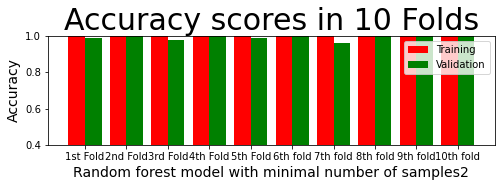

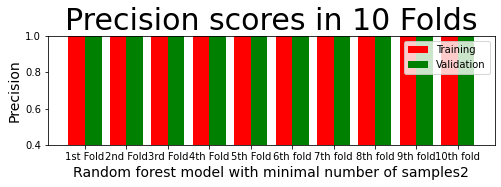

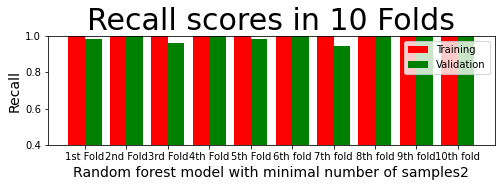

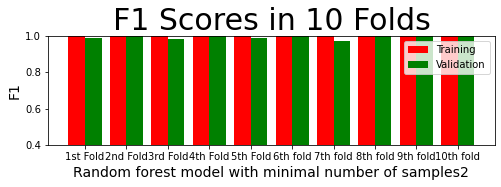

In [4]:
#FOREST 
forest_model = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_split=hyperparameters['bc_trees']) #creating the random forest model with the optimal hyperparameter
results['forest_model_results'] = runmodel(forest_model,xt,yt,xv,yv,10,'Random forest model with minimal number of samples' + str(hyperparameters['bc_trees'])) #check runmodel for more info
allF1['Random Forest'] = results['forest_model_results']['f1 score'] #appedning the f1 score to the dictionary created earlier

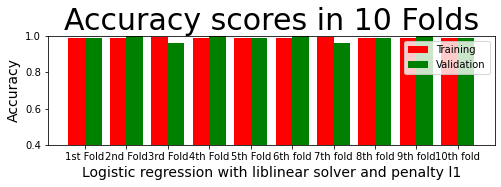

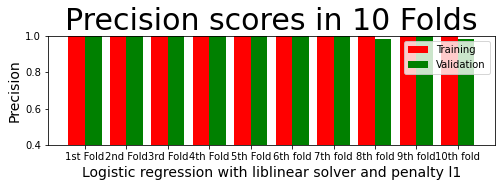

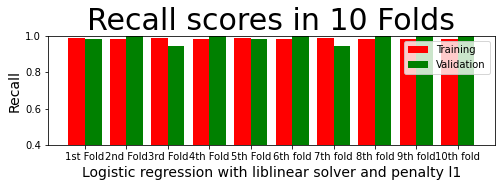

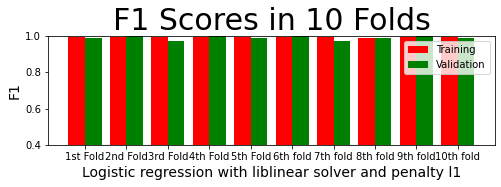

In [5]:
#LOGISTIC REGRESSION
logmodel = LogisticRegression(solver = hyperparameters['bc_log'][0] , penalty=hyperparameters['bc_log'][1]) #creating the logistic regression model with the optimal hyperparameters
results['logmodel_results'] = runmodel(logmodel,xt,yt,xv,yv,10,'Logistic regression with {} solver and penalty {}'.format(hyperparameters['bc_log'][0],hyperparameters['bc_log'][1])) #check runmodel for more info
allF1['Logistic regression'] = results['logmodel_results']['f1 score']#appedning the f1 score to the dictionary created earlier

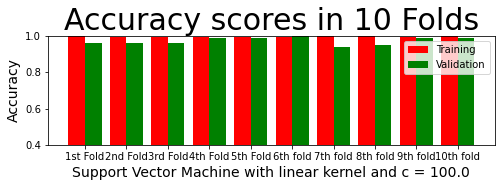

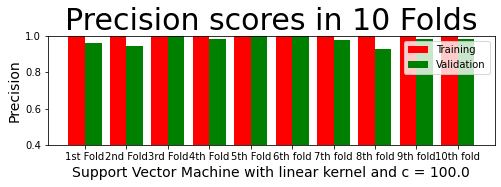

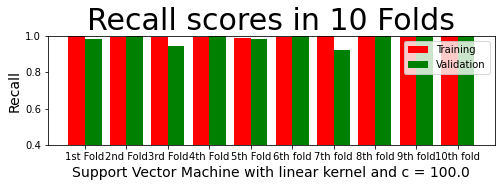

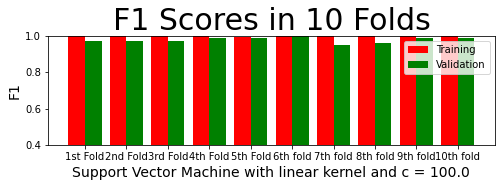

In [6]:
#svc linear
svcL = SVC(kernel='linear', C=hyperparameters['bc_svcL']) #creating the support machine vector model with the optimal hyperparameters and linear kernel
results['svcL_results'] = runmodel(svcL,xtscaled,yt,xvscaled,yv,10,'Support Vector Machine with linear kernel and c = {}'.format(hyperparameters['bc_svcL'])) #check runmodel for more info
allF1['Linear kerner Support vector machine'] = results['svcL_results']['f1 score'] #appedning the f1 score to the dictionary created earlier

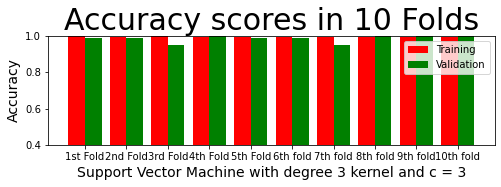

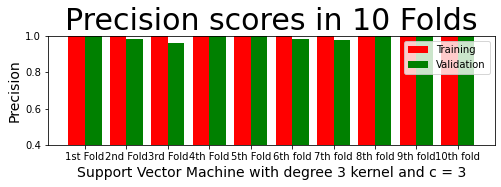

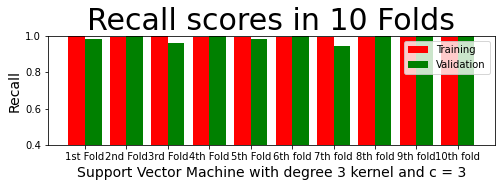

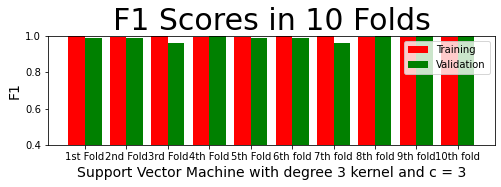

In [7]:
#svc poly 2
svcP = SVC(kernel='poly',degree = hyperparameters['bc_svcP'][1], C=hyperparameters['bc_svcP'][0]) #creating the support machine vector model with the optimal hyperparameters and polynomial kernel
results['svcP_results']= runmodel(svcP,xtscaled,yt,xvscaled,yv,10,'Support Vector Machine with degree {} kernel and c = {}'.format(hyperparameters['bc_svcP'][1],hyperparameters['bc_svcP'][0])) #check runmodel for more info
allF1['poly kerner Support vector machine'] = results['svcP_results']['f1 score'] #appedning the f1 score to the dictionary created earlier

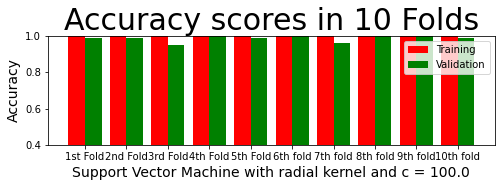

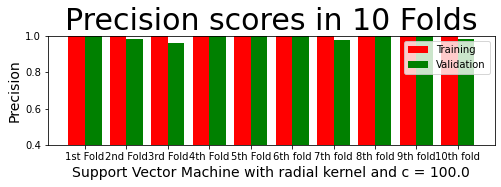

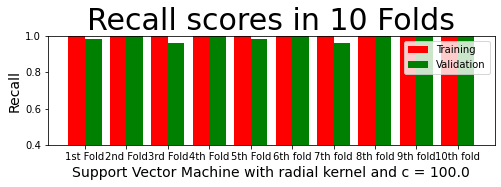

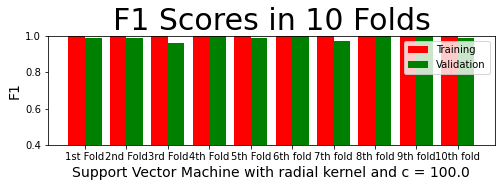

In [8]:
#svc radial
svcR = SVC(kernel='rbf', C=hyperparameters['bc_svcR'])  #creating the support machine vector model with the optimal hyperparameters and radial kernel
results['svcR_results']= runmodel(svcR,xtscaled,yt,xvscaled,yv,10,'Support Vector Machine with radial kernel and c = {}'.format(hyperparameters['bc_svcR'])) #check runmodel for more info
allF1['Radial kerner Support vector machine'] = results['svcR_results']['f1 score'] #appedning the f1 score to the dictionary created earlier

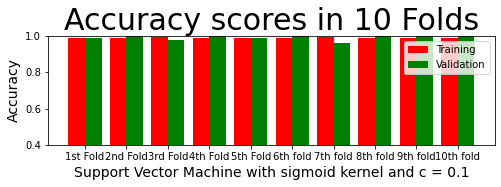

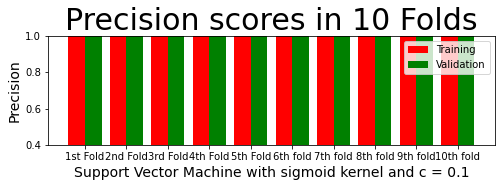

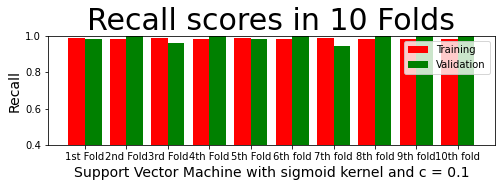

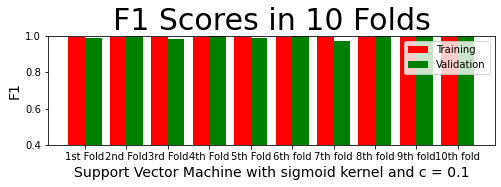

In [9]:
#svc sigmoid
svcS = SVC(kernel='sigmoid', C=hyperparameters['bc_svcS'])  #creating the support machine vector model with the optimal hyperparameters and sigmoid kernel
results['svcS_results']= runmodel(svcS,xtscaled,yt,xvscaled,yv,10,'Support Vector Machine with sigmoid kernel and c = {}'.format(hyperparameters['bc_svcS'])) #check runmodel for more info
allF1['Sigmoid kerner Support vector machine'] = results['svcS_results']['f1 score'] #appedning the f1 score to the dictionary created earlier

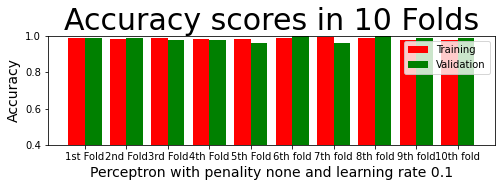

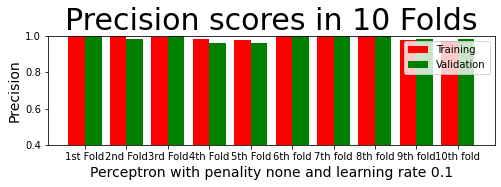

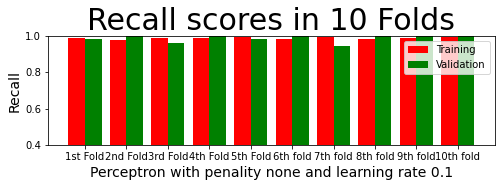

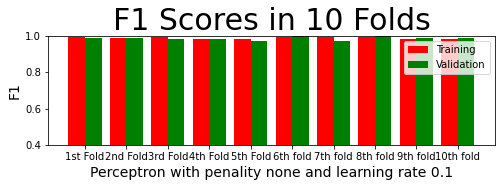

In [10]:
#Perceptron
perc = Perceptron(penalty = hyperparameters['perc'][0],eta0 = hyperparameters['perc'][1] ,max_iter= 1000,tol=1e-3) #creating the Perceptron model with optimal hyperparamters and max iterations 10000
results['perceptron'] = runmodel(perc,xtscaled,yt,xvscaled,yv,10,'Perceptron with penality {} and learning rate {}'.format( hyperparameters['perc'][0],hyperparameters['perc'][1])) #check runmodel for more info
allF1['perceptron'] = results['perceptron']['f1 score'] #appedning the f1 score to the dictionary created earlier

In [11]:
#stacking
#when implementing stacking, multiple models are used. We've noticed that random forests perform poorly with scaled data while support machine vectors take a long time to fit unscaled data and Perceptron perfroms poorly with it, therefore we created piplines that help us solve that issue by scaling the data before plugging it in the support machine vector / perceptron
svcR_pipeline = make_pipeline(MinMaxScaler(feature_range=(-1, 1)), svcR)
perc_pipeline = make_pipeline(MinMaxScaler(feature_range=(-1,1)),perc)
svcS_pipeline = make_pipeline(MinMaxScaler(feature_range=(-1,1)), svcS)

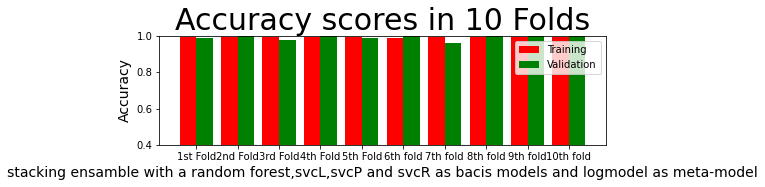

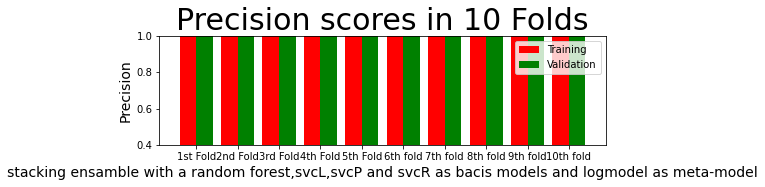

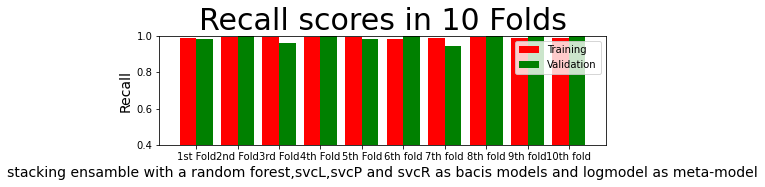

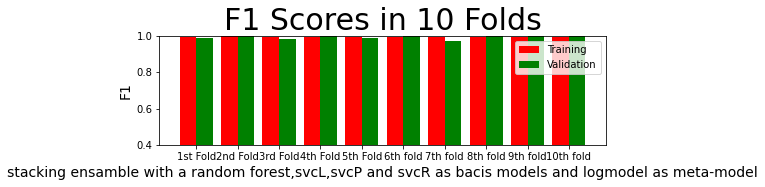

In [12]:
estimators = [ ('Forest',forest_model),('svcR',svcR_pipeline),('svcS',svcS_pipeline),('perc',perc_pipeline)] #making the list of classifiers that are going to be used for stacking
hyperparameters['stack'] = stack_tuning(estimators) #tuning the metamodel
logmodelstack = LogisticRegression(solver = hyperparameters['stack'][0] , penalty=hyperparameters['stack'][1]) #creating the optimal metamodel
stacking_model = StackingClassifier(estimators,final_estimator= logmodelstack) #creating the stacking model using the aforementioned estimators and the optimal logmodel as the final/meta estimator
stacking_results= runmodel(stacking_model,xt,yt,xv,yv,10,'stacking ensamble with a random forest,svcL,svcP and svcR as bacis models and logmodel as meta-model')  #check runmodel for more info
allF1['Stacking'] = stacking_results['f1 score']  #appedning the f1 score to the dictionary created earlier

In [ ]:
#simulation
sim_res = simulate(100) #see function simulate for more info, keep in mind that this code might take a while and that is why its set to 100
print(sim_res)